In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# 1.Data warehouse

In [506]:
df=pd.read_csv("DS - Part3 - CompanyX_EU.csv")

In [507]:
df.shape

(662, 6)

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [419]:
df.columns

Index(['Startup', 'Product', 'Funding', 'Event', 'Result', 'OperatingState'], dtype='object')

In [509]:
df.head(10)

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
9,Adgregate Markets,adgregate.com,NaN,TC50 2008,Contestant,Operating


In [421]:
df.describe(include='all')

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,2600Hz,2600hz.com,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


# 2.Data exploration
    
2.1 Check the datatypes of each attribute.
2.2 Check for null values in the attributes.

In [510]:
#2.1 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [511]:
#2.2
df.isna().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [425]:
df.duplicated().sum()

0

# 3.Data preprocessing & visualisation

3.1 Drop the null values.
3.2 Convert the ‘Funding’ features to a numerical value.

In [512]:
df1 = df.dropna()
df1.shape

(446, 6)

Observation : 
212 null records dropped with new dataframe df1

In [513]:
df1.isna().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

Observation : 
Null Values removed in dataframe df1

In [428]:
df1.head(10)
df1.Funding.unique()

array(['$630K', '$1M', '$19.3M', '$29M', '$1.8M', '$750K', '$17.9K',
       '$11.6M', '$929.2K', '$12.2M', '$1.9M', '$4M', '$3M', '$225K',
       '$24M', '$746K', '$600K', '$7.1M', '$4.5M', '$50.9M', '$8.3M',
       '$12.3M', '$190K', '$40M', '$520K', '$2.9M', '$320K', '$1.7M',
       '$20K', '$205M', '$16.5M', '$2.8M', '$125K', '$350K', '$20.8M',
       '$675K', '$6.5M', '$2M', '$118K', '$20.5M', '$7.2M', '$2.3M',
       '$212K', '$7M', '$8.1M', '$8.5M', '$325K', '$150K', '$5M', '$60K',
       '$8.8M', '$120K', '$3.1M', '$5.5M', '$2.2M', '$496K', '$1.4M',
       '$32.5M', '$19M', '$475K', '$182.1M', '$6.7M', '$848K', '$1.3M',
       '$12M', '$2.6M', '$411.5K', '$925K', '$35.4M', '$38M', '$37.1M',
       '$6.8M', '$72M', '$64M', '$12.5M', '$900K', '$100K', '$7.3M',
       '$983K', '$9.7M', '$5.4M', '$160K', '$300K', '$1.7B', '$10.1M',
       '$485K', '$8M', '$4.3M', '$10M', '$34.6M', '$16.3M', '$2.4M',
       '$650K', '$35.5M', '$15.4M', '$18.2M', '$30.1M', '$26M', '$1.2M',
       '$79

In [514]:
df1['Funding1'] = df1['Funding'].str[1:].replace({'K': '*1e3', 'M': '*1e6','B': '*1e9'}, regex=True).map(pd.eval).astype(int)
df1['FundingMillion']=df1['Funding1']/1000000
df1.count()

/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_6406/69335416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Funding1'] = df1['Funding'].str[1:].replace({'K': '*1e3', 'M': '*1e6','B': '*1e9'}, regex=True).map(pd.eval).astype(int)
/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_6406/69335416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FundingMillion']=df1['Funding1']/1000000


Startup           446
Product           446
Funding           446
Event             446
Result            446
OperatingState    446
Funding1          446
FundingMillion    446
dtype: int64

In [556]:
df2=df1.drop(columns=['Funding','Funding1'])
df2['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

In [ ]:
Observation : 
    Funding column data type changed to FundingMillion as numeric data type also applied Millionn Convertion.
    Data cleansing done and available in df2

In [516]:
df2.head(100)

,Startup,Product,Event,Result,OperatingState,FundingMillion
1,3DLT,3dlt.com,Disrupt NYC 2013,Contestant,Closed,0.630
3,3Dprintler,3dprintler.com,Disrupt NY 2016,Audience choice,Operating,1.000
5,5to1,5to1.com,TC50 2009,Contestant,Acquired,19.300
6,8 Securities,8securities.com,Disrupt Beijing 2011,Finalist,Operating,29.000
10,AdhereTech,adheretech.com,Hardware Battlefield 2014,Contestant,Operating,1.800
...,...,...,...,...,...,...
146,Dispatch,dispatch.com,Disrupt SF 2012,Contestant,Acquired,0.983
147,DocSend,docsend.com,Disrupt NYC 2014,Contestant,Operating,9.700
148,Docstoc,docstoc.com,TC40 2007,Contestant,Closed,4.000
149,Docurated,docurated.com,Disrupt NYC 2013,Contestant,Operating,5.400


In [ ]:
Observation : 
215 Null records dropped from data set 
Funding Data type changed to Million  Value  

# 3.3 Plot box plot for funds in million.

In [432]:
df2.describe()

,FundingMillion
count,446.000000
mean,17.241489
std,90.483710
min,0.005000
25%,0.745250
50%,2.200000
75%,9.475000
max,1700.000000


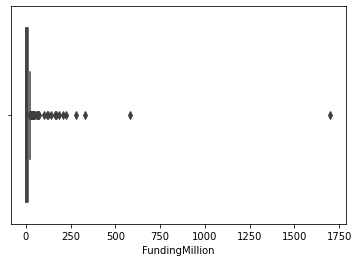

In [517]:
fund=df2['FundingMillion']
sns.boxplot(x=fund)
plt.show()

In [ ]:
Observation : 
    Min value .005 and max value will be 1700 . So we didn't get proper Box plot 
    There is more devaition between Mean value (17.24) , min value('0.005'),Max (1700)

# 3.4  Get the lower fence from the box plot.

In [518]:
Q1 = df2["FundingMillion"].quantile(0.25)
Q3 = df2["FundingMillion"].quantile(0.75)
IQR = Q3 - Q1
print("Q1",Q1)
print("Q3",Q3)
print("IQR",IQR)

Q1 0.74525
Q3 9.475
IQR 8.72975


In [519]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print("Lower Fence Value ",Lower_Fence)
print("Upper Fence Value ",Upper_Fence)

Lower Fence Value  -12.349374999999998
Upper Fence Value  22.569625


In [436]:
df2.head(100)

,Startup,Product,Event,Result,OperatingState,FundingMillion
1,3DLT,3dlt.com,Disrupt NYC 2013,Contestant,Closed,0.630
3,3Dprintler,3dprintler.com,Disrupt NY 2016,Audience choice,Operating,1.000
5,5to1,5to1.com,TC50 2009,Contestant,Acquired,19.300
6,8 Securities,8securities.com,Disrupt Beijing 2011,Finalist,Operating,29.000
10,AdhereTech,adheretech.com,Hardware Battlefield 2014,Contestant,Operating,1.800
...,...,...,...,...,...,...
146,Dispatch,dispatch.com,Disrupt SF 2012,Contestant,Acquired,0.983
147,DocSend,docsend.com,Disrupt NYC 2014,Contestant,Operating,9.700
148,Docstoc,docstoc.com,TC40 2007,Contestant,Closed,4.000
149,Docurated,docurated.com,Disrupt NYC 2013,Contestant,Operating,5.400


# 3.5 Check number of outliers greater than upper fence.

In [520]:
df_grt_upperfense=df2.where(df2["FundingMillion"] > 22.2569625).dropna()

In [521]:
print("Number of outliers Greater than upper fense ",df_grt_upperfense.count())

Number of outliers Greater than upper fense  Startup           60
Product           60
Event             60
Result            60
OperatingState    60
FundingMillion    60
dtype: int64


# 3.6 Drop the values that are greater than upper fence

In [522]:
df_drop_upp=df2.where(df2["FundingMillion"] <= 22.2569625).dropna()

In [525]:
df_drop_upp.describe()

,FundingMillion
count,386.00000
mean,3.72514
std,4.73236
min,0.00500
25%,0.60000
50%,1.70000
75%,5.00000
max,22.00000


# 3.7 Plot the box plot after dropping the values.

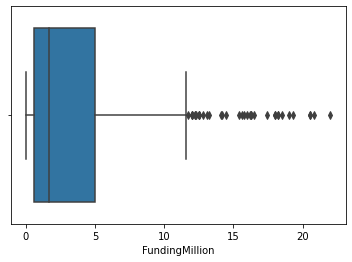

In [524]:
fund=df_drop_upp['FundingMillion']
sns.boxplot(x=fund)
plt.show()

# 3. 8 Check frequency of the OperatingState features classes

In [526]:
df['OperatingState'].value_counts().to_dict()

{'Operating': 465, 'Closed': 106, 'Acquired': 86, 'Ipo': 5}

<AxesSubplot:>

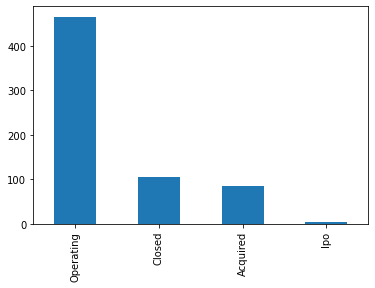

In [527]:
df['OperatingState'].value_counts().plot(kind='bar')


# 3.9 Plot a distribution plot for Funds in million.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FundingMillion', ylabel='Density'>

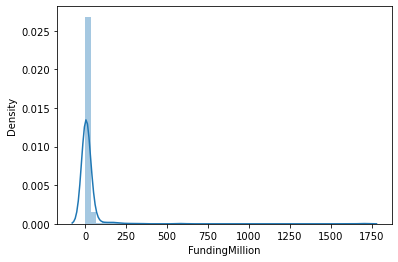

In [528]:
sns.distplot(df2.FundingMillion)

# 3.9 Plot distribution plots for companies still operating 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FundingMillion', ylabel='Density'>

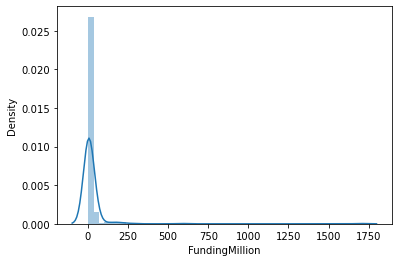

In [529]:
df_op=df2.where(df2["OperatingState"] =='Operating')
sns.distplot(df_op.FundingMillion)

# 3.10 Plot distribution plots for companies still closed.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FundingMillion', ylabel='Density'>

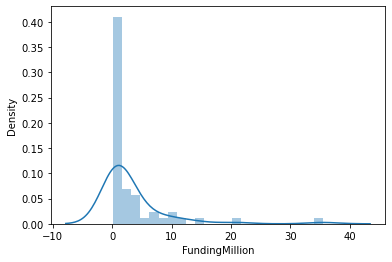

In [530]:
df_closed=df2.where(df2["OperatingState"] =='Closed')
sns.distplot(df_closed.FundingMillion)

# 4 Statistical analysis

# 4.1 Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

In [ ]:
Mean values which needs to compared : Funds ( Our Data has in Million Conversion )
Groups : Closed Company , Operating Company 

Null Hypothesis :The two groups(Closed,Operating) have the same mean
Null Hypothesis will be there is no significat difference Funds raised between Companies Operating and closed
Alternatie Hypothesis
   There is significat difference Funds raised between Companies Operating and closed
   

In [531]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

In [533]:
df_Operating=df1.where(df1["OperatingState"] =='Operating')["FundingMillion"].dropna()
df_closed=df1.where(df1["OperatingState"] =='Closed')["FundingMillion"].dropna()
print("Operating Count",df_Operating.count())
print("Closed Count",df_closed.count())

Operating Count 319
Closed Count 57


In [460]:
print("Operating Company Variance",df_Operating.var())
print("Closed  Company Variance",df_closed.var())
print("Variance ratio of Groups ",df_Operating.var()/df_closed.var())

Operating Company Variance 10957.324767466052
Closed  Company Variance 35.08541145277927
Variance ratio of Groups  312.3042972493935


In [534]:
## two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance - Levene)
t_statistic, p_value = ttest_ind(df_Operating, df_closed)
print(t_statistic, p_value)

1.1382924521671383 0.2557270186090243


In [ ]:
As P value is greater than 0.25 So we Alternative Hypothesis . 
Observation : Theres is significat difference are there 

In [536]:
print("Operating Company Variance",df_Operating.var())
print("Closed  Company Variance",df_closed.var())
print("Variance ratio of Groups ",df_Operating.var()/df_closed.var())

Operating Company Variance 10957.324767466052
Closed  Company Variance 35.08541145277927
Variance ratio of Groups  312.3042972493935


In [535]:
## two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the different variance...
# (can be checked with tests for equal variance - Levene)
t_statistic, p_value = ttest_ind(df_Operating, df_closed,equal_var=False)
print(t_statistic, p_value)

2.672721434336835 0.007898898690192623


In [ ]:
Observation & Conclustion of T Test 

P Value (0.0078) which is less than alpha (.05) We don't have enough evidene so rejecting Null Hypotheis . 
There is significant difference between Funds raised by companies that are still operating vs companies that closed down


# 4.2 Make a copy of the original data frame

In [453]:
df_stats=df2
#Data cleansed Data frame used

# 4.3 Check frequency distribution of Result variable.

In [537]:
df_stats['Result'].value_counts().to_dict()

{'Contestant': 312,
 'Finalist': 65,
 'Audience choice': 25,
 'Winner': 25,
 'Runner up': 19}

<AxesSubplot:>

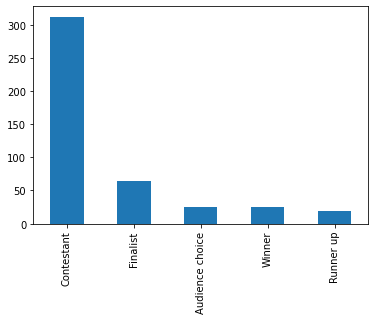

In [538]:
df_stats['Result'].value_counts().plot(kind='bar')

# 4.4  Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [539]:
df_operating=df1.where(df1["OperatingState"] =='Operating').dropna()
df_operating.head()
df_operating.count()

Startup           319
Product           319
Funding           319
Event             319
Result            319
OperatingState    319
Funding1          319
FundingMillion    319
dtype: int64

In [540]:
df_operating['Result'].value_counts().to_dict()

{'Contestant': 214,
 'Finalist': 46,
 'Audience choice': 23,
 'Winner': 18,
 'Runner up': 18}

In [541]:
print("percentage of winners that are still operating",(18/316)*100,'%')
print("percentage of contestants that are still operating",(214/316)*100,'%')

percentage of winners that are still operating 5.69620253164557 %
percentage of contestants that are still operating 67.72151898734177 %


In [469]:
df_operating.head(10)

,Startup,Product,Funding,Event,Result,OperatingState,Funding1,FundingMillion
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1000000.0,1.0000
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29000000.0,29.0000
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1800000.0,1.8000
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,1000000.0,1.0000
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,750000.0,0.7500
15,AirBoxLab,foobot.io,$17.9K,Hardware Battlefield 2014,Contestant,Operating,17900.0,0.0179
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,11600000.0,11.6000
18,AirHelp,airhelp.com,$12.2M,Disrupt NYC 2014,Contestant,Operating,12200000.0,12.2000
22,Alicanto,alicanto.com,$4M,Disrupt SF 2012,Contestant,Operating,4000000.0,4.0000
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24000000.0,24.0000


# 4.5 Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:


In [544]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([18, 214] , [319, 319])
print("P Value",pval)

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

P Value 1.5467413703711346e-58
With a p-value of 0.0 the difference is significant. aka |We reject the null|


# 4.6 Check distribution of the Event variable.

<AxesSubplot:>

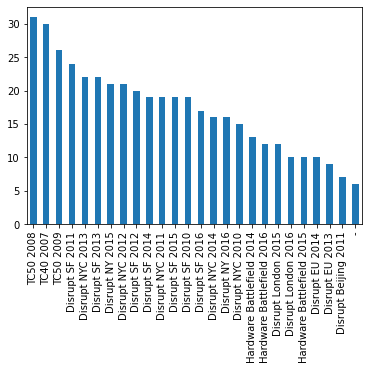

In [545]:

df1['Event'].value_counts().plot(kind='bar')


# 4.7 Select only the Event that has disrupt keyword from 2013 onwards.

In [546]:
df6=df1.where(df1["Event"].str.contains('Disrupt')).dropna()
df6['Event2013'] = df1['Event'].str[-4:]
df6['Event2013'] =pd.to_numeric(df6['Event2013'], errors='coerce')
df7 =df6.where(df6['Event2013'] >= 2013).dropna()


<AxesSubplot:>

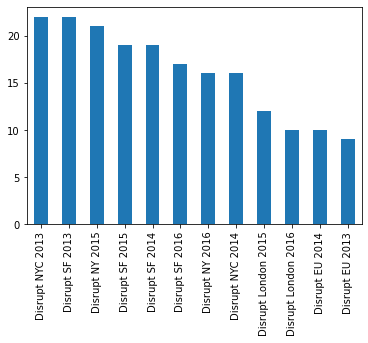

In [547]:
df7['Event'].value_counts().plot(kind='bar')

# 4.8 Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 Onwards

In [548]:
df8=df1
df8['city'] = df1['Event'].str.slice(-7,-5)


/var/folders/7p/5k1s0qxj2mn1kmk2d_npxq8r0000gn/T/ipykernel_6406/2005311695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['city'] = df1['Event'].str.slice(-7,-5)


In [549]:
df9=df8.where(df8.city.isin(['NY','SF','EU'])).dropna()
df9['city'].value_counts()

SF    140
NY     37
EU     19
Name: city, dtype: int64

In [550]:
# Group Funding  data by City
#city_frame = df9({"city":city,"Fuding":FundingMillion})
city_frame = df9[['city','FundingMillion']]
groups = city_frame.groupby("city")
groups.head(10)

,city,FundingMillion
3,NY,1.0000
13,SF,1.0000
16,SF,11.6000
22,SF,4.0000
27,SF,3.0000
42,EU,8.3000
46,SF,12.3000
49,SF,40.0000
51,NY,0.5200
52,SF,2.9000


In [551]:
df_EU=city_frame['FundingMillion'].where(city_frame["city"] =='EU').dropna()
df_NY=city_frame['FundingMillion'].where(city_frame["city"] =='NY').dropna()
df_SF=city_frame['FundingMillion'].where(city_frame["city"] =='SF').dropna()
df_SF.head()

13     1.0
16    11.6
22     4.0
27     3.0
46    12.3
Name: FundingMillion, dtype: float64

In [552]:
# Perform the ANOVA
stats.f_oneway(df_EU, df_NY, df_SF)

F_onewayResult(statistic=1.9427783729374277, pvalue=0.14609757807086768)

The test output yields an F-statistic of 1.942 and a p-value of 0.146, indicating that there is no significant difference between the means of each group.

Now let's make Funding data where the group means do differ and run a second ANOVA:

In [553]:
# Alternate method
model = ols('FundingMillion ~ city',                 # Model formula
            data = city_frame).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df         F    PR(>F)
city        2733.554606    2.0  1.942778  0.146098
Residual  135778.750249  193.0       NaN       NaN


Observation : 

The test output yields an F-statistic of 1.942778 and a p-value of 0.146098, indicating that there is no significant difference between the means of each group.


# 4.9 Plot the distribution plot comparing the 3 city events.

<AxesSubplot:>

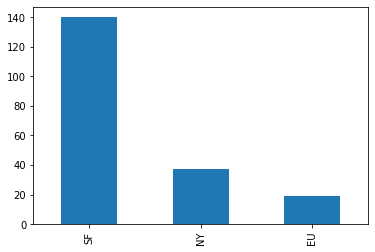

In [554]:
df9['city'].value_counts().plot(kind='bar')

volume : We have 4 different category data (Operating 319,Acquired 66,Closed 57,Ipo 4) only with small amount. Need to get more data 

Veracity: Our data set is small , it has out liers and missing information . With these , Eventually it effects the reliability of its results.

Funding values differs with very large ,mean, high ,min values has lot of differece. We need large data set to get the proper data

Differnent category (Winner,Cons) mean values not differ with these data set 